In [5]:
from ultralytics import YOLO

# Load the trained YOLO classification model
model = YOLO('ip_recog/deploy_models/models/best.pt')

# Specify the path to the image
image_path = 'C:/Users/AB/Desktop/Django/ip_deploy/media/IP000000003_AJRbUjf.jpg'

# Predict the class of the image
results = model.predict(image_path)

# Extract the top class and its confidence
for r in results:
    # Get the index of the class with the highest probability
    class_index = r.probs.top1
    # Get the class name associated with the predicted class index
    class_name = r.names[class_index]
    # Get the confidence score for the top predicted class
    confidence = r.probs.top1conf.item()  # Convert tensor to a Python float

    # Output the result
    print(f"Predicted Class: {class_name}, Confidence: {confidence:.2f}")




image 1/1 C:\Users\AB\Desktop\Django\ip_deploy\media\IP000000003_AJRbUjf.jpg: 224x224 0 1.00, 13 0.00, 1 0.00, 22 0.00, 26 0.00, 23.3ms
Speed: 18.8ms preprocess, 23.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Predicted Class: 0, Confidence: 1.00


In [17]:
from ultralytics import YOLO
import json

def yolo_give_name(path):
    # Load the trained YOLO classification model
    model = YOLO('ip_recog/deploy_models/models/best.pt')

    # Specify the path to the image
    image_path = path

    # Predict the class of the image
    results = model.predict(image_path)
    
    json_file_path = 'ip_recog/deploy_models/data/ip102_class_labels.json'
    # Load the class names from the JSON file
    with open(json_file_path, 'r') as f:
        class_names = json.load(f)

    # Extract the top class and its confidence
    for r in results:
        # Get the index of the class with the highest probability
        class_index = r.probs.top1
        # Load the class names from the JSON file
        class_name = class_names[str(class_index)]
        # Get the confidence score for the top predicted class
        confidence = r.probs.top1conf.item()  # Convert tensor to a Python float

        # Output the result
        print(f"Predicted Class: {class_name}, Confidence: {confidence:.2f}")
        return class_index , class_name

image_path = 'C:/Users/AB/Desktop/Django/ip_deploy/media/IP000000003_AJRbUjf.jpg'
yolo_give_name(image_path)



image 1/1 C:\Users\AB\Desktop\Django\ip_deploy\media\IP000000003_AJRbUjf.jpg: 224x224 0 1.00, 13 0.00, 1 0.00, 22 0.00, 26 0.00, 27.9ms
Speed: 67.0ms preprocess, 27.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Predicted Class: rice leaf roller, Confidence: 1.00


(0, 'rice leaf roller')

In [8]:
import json

In [13]:

class_name = class_names[str(class_index)]
class_name

'rice leaf roller'

In [20]:
import torch
from torchvision import models, transforms
from PIL import Image
import json

def resnet_50_givename(image_path ):
# Set device (CPU since no CUDA is available)
    device = torch.device('cpu')

    # Number of classes in IP102
    num_classes = 102

    # Load the ResNet50 model architecture
    model = models.resnet50()

    # Modify the final fully connected layer to match IP102 classes
    model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

    # Load the model weights from the .pkl file, mapping them to CPU
    model_path = 'ip_recog/deploy_models/models/resnet50_0.497.pkl'
    model.load_state_dict(torch.load(model_path, weights_only= True, map_location=torch.device('cpu')))

    # Move the model to the CPU
    model = model.to(device)

    # Set the model in evaluation mode
    model.eval()

    # Define the transformation for the input image (ResNet50 requires 224x224 images)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Function to predict the class of a single image
    def predict_image(image_path, model):
        # Load the image
        image = Image.open(image_path).convert('RGB')
        
        # Apply transformations
        image = transform(image).unsqueeze(0)  # Add batch dimension
        
        # Move the image to the device (CPU in this case)
        image = image.to(device)
        
        # Make prediction
        with torch.no_grad():
            output = model(image)
            _, predicted_class = torch.max(output, 1)
        
        # Return the predicted class index
        return predicted_class.item()

    # Predict the class of the image
    predicted_class = predict_image(image_path, model)

    with open('ip_recog/deploy_models/data/ip102_class_labels.json', 'r') as f:
        class_labels = json.load(f)

    # Print the predicted class label
    print(f'Predicted class: {class_labels[str(predicted_class)]}')
image_path = 'C:/Users/AB/Desktop/Django/ip_deploy/media/IP000000075.jpg'
resnet_50_givename(image_path)

Predicted class: rice leaf roller


In [17]:
import torch

model_path = "C:/Users/AB/Desktop/Django/ip_deploy/ip_recog/deploy_models/code_files/resnet50.py"

try:
    model = torch.load(model_path, map_location=torch.device('cpu'),weights_only=True)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")


Error loading model: Weights only load failed. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
 Please file an issue with the following so that we can make `weights_only=True` compatible with your use case: WeightsUnpickler error: Unsupported operand 105

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.


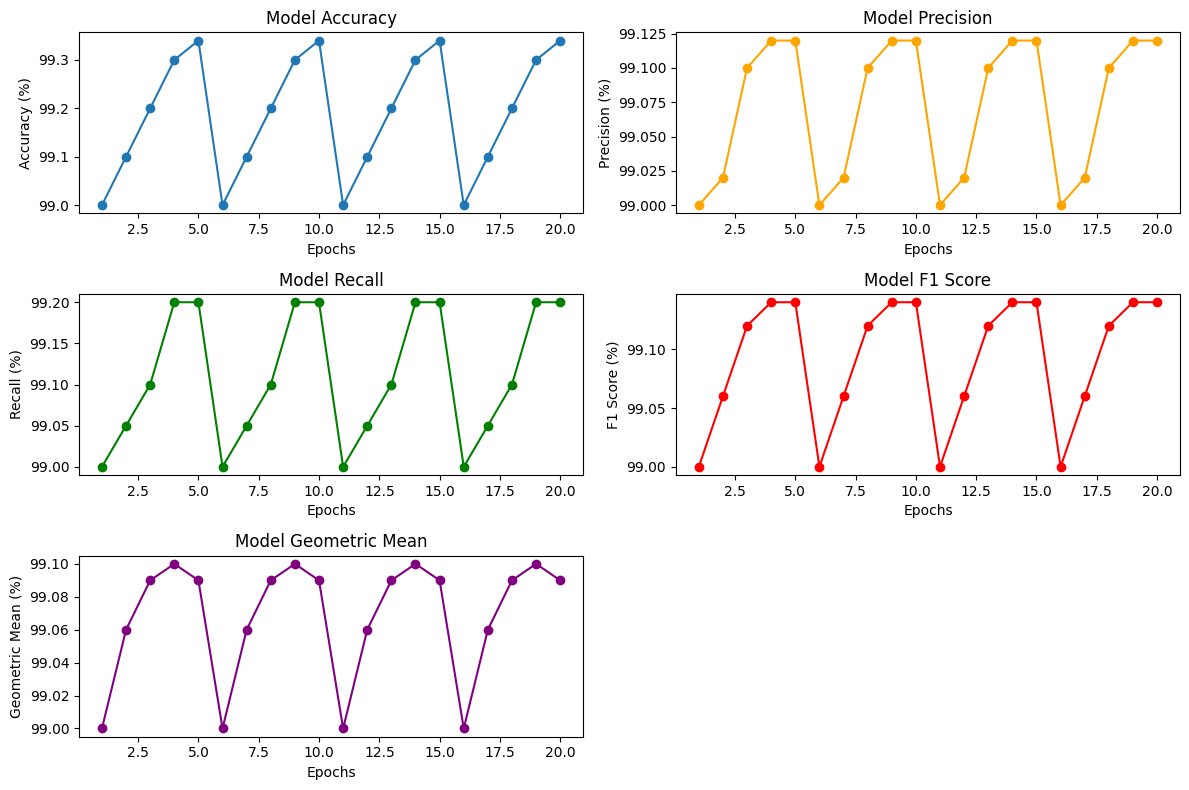

In [1]:
import matplotlib.pyplot as plt

# Sample data
epochs = range(1, 21)  # Assuming 20 epochs
accuracy = [99.00, 99.10, 99.20, 99.30, 99.34] * 4  # Sample accuracy data
precision = [99.00, 99.02, 99.10, 99.12, 99.12] * 4  # Sample precision data
recall = [99.00, 99.05, 99.10, 99.20, 99.20] * 4  # Sample recall data
f1_score = [99.00, 99.06, 99.12, 99.14, 99.14] * 4  # Sample F1 score data
geometric_mean = [99.00, 99.06, 99.09, 99.10, 99.09] * 4  # Sample GM data

plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(3, 2, 1)
plt.plot(epochs, accuracy, marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# Precision
plt.subplot(3, 2, 2)
plt.plot(epochs, precision, marker='o', color='orange')
plt.title('Model Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision (%)')

# Recall
plt.subplot(3, 2, 3)
plt.plot(epochs, recall, marker='o', color='green')
plt.title('Model Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall (%)')

# F1 Score
plt.subplot(3, 2, 4)
plt.plot(epochs, f1_score, marker='o', color='red')
plt.title('Model F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score (%)')

# Geometric Mean
plt.subplot(3, 2, 5)
plt.plot(epochs, geometric_mean, marker='o', color='purple')
plt.title('Model Geometric Mean')
plt.xlabel('Epochs')
plt.ylabel('Geometric Mean (%)')

plt.tight_layout()
plt.show()
